In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import train_fcn as tfcn
import data_generator as dgtr
import PIL.Image as Image
import numpy as np

In [2]:
net = tfcn.train()

Read 34 images
Read 29 images
Epoch: 1, Train Loss: 3.09548, Train Acc: 0.06797, Train Mean IU: 0.00656,     Valid Loss: 2.12149, Valid Acc: 0.62375, Valid Mean IU: 0.09440 Time: 0:0:2
Epoch: 2, Train Loss: 2.16353, Train Acc: 0.58367, Train Mean IU: 0.08581,     Valid Loss: 1.77920, Valid Acc: 0.68135, Valid Mean IU: 0.24729 Time: 0:0:2
Epoch: 3, Train Loss: 1.74584, Train Acc: 0.65585, Train Mean IU: 0.24818,     Valid Loss: 1.65439, Valid Acc: 0.66968, Valid Mean IU: 0.20914 Time: 0:0:2
Epoch: 4, Train Loss: 1.50359, Train Acc: 0.68221, Train Mean IU: 0.22679,     Valid Loss: 1.59955, Valid Acc: 0.68471, Valid Mean IU: 0.25689 Time: 0:0:2
Epoch: 5, Train Loss: 1.39922, Train Acc: 0.66682, Train Mean IU: 0.29735,     Valid Loss: 1.72565, Valid Acc: 0.59185, Valid Mean IU: 0.18725 Time: 0:0:2
Epoch: 6, Train Loss: 1.48534, Train Acc: 0.61953, Train Mean IU: 0.18632,     Valid Loss: 1.60031, Valid Acc: 0.67821, Valid Mean IU: 0.26705 Time: 0:0:3
Epoch: 7, Train Loss: 1.30572, Train Acc

In [3]:
colormap = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128],
                    [128, 0, 128], [0, 128, 128], [128, 128, 128], [64, 0, 0], [192, 0, 0],
                    [64, 128, 0], [192, 128, 0], [64, 0, 128], [192, 0, 128],
                    [64, 128, 128], [192, 128, 128], [0, 64, 0], [128, 64, 0],
                    [0, 192, 0], [128, 192, 0], [0, 64, 128]]
cm = np.array(colormap).astype('uint8')

In [4]:
def predict(im, label): 
    im = Variable(im.unsqueeze(0)).cuda()
    out = net(im)
    pred = out.max(1)[1].squeeze().cpu().data.numpy()
    pred = cm[pred]
    return pred, cm[label.numpy()]

In [5]:
train_d, val_d, train_data, test_data, classList = dgtr.generate_data()

Read 34 images
Read 29 images


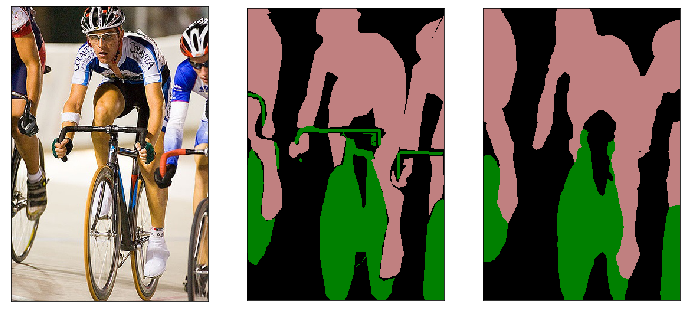

In [17]:
i = 0

p, figs = plt.subplots(1, 3, figsize=(12, 10))

test_data, test_label = train_data[i]
pred, label = predict(test_data, test_label)
figs[0].imshow(Image.open(train_data.data_list[i]))
figs[0].axes.get_xaxis().set_visible(False)
figs[0].axes.get_yaxis().set_visible(False)
figs[1].imshow(label)
figs[1].axes.get_xaxis().set_visible(False)
figs[1].axes.get_yaxis().set_visible(False)
figs[2].imshow(pred)
figs[2].axes.get_xaxis().set_visible(False)
figs[2].axes.get_yaxis().set_visible(False)
p.savefig('./Figs/out1.png')

In [7]:
torch.save(net.state_dict(), './model_params/fcn-8s')